In [92]:
# 필요 패키지 임포드
import pandas
import numpy#
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from numpy.linalg import eigh
import seaborn

#
# 1. DATA LOAD
# 
# Kaggle에서 제공하는 [BNP Paribas Cardif Claims Management](https://www.kaggle.com/c/bnp-paribas-cardif-claims-management/data)데이터를 활용
# BNP Paribas Cardif 청구관리 데이터 셋으로 고객의 클레임 여부를 판단하는 데이터셋의 Subset
DATA_PATH = "c:\\Users\\WAI\\OneDrive\\03.WORKSPACE\\00.DATA\\"
df = pandas.read_csv(DATA_PATH + "BookExample.csv")
print(df.shape) # (20000, 33)
target_df = df[["target"]]
df.set_index(["ID","target"], inplace=True)

In [90]:
# 범주화 및 인코딩 하기전의 데이터 셋
n_obj_cols = []
for col, type in zip(df.dtypes.index, df.dtypes.values):
    if type != ("object"):
        n_obj_cols.append(col)

n_obj_df = df[n_obj_cols]
print(n_obj_df.shape)

# PCA를 하기전에 Scale 조정을 통해 각 특성의 분산량을 동일 하게 수정
x = n_obj_df.values
x = StandardScaler().fit_transform(x)
features = n_obj_cols
print(pandas.DataFrame(x, columns = features).head())
#print(pandas.DataFrame(x, columns = features).describe())

(20000, 33)
(20000, 26)
         v1        v2        v4        v5        v6        v7        v8  \
0  0.358438  1.039820  0.704778  0.627939  0.949960  1.352400 -0.389224   
1 -0.811045 -0.982284 -1.056727  0.907032 -1.075637 -1.080416  0.640466   
2  0.015350  0.248030  0.924883  0.061637  2.025628  1.928022 -0.386208   
3 -0.112883  0.941879  0.841755  1.439884  0.559084  0.441618 -0.317687   
4 -0.811045 -0.982284 -1.056727 -1.103328 -1.075637 -1.080416 -0.395047   

         v9       v10       v11  ...       v18       v19       v20       v21  \
0  1.037773 -0.984941  0.996999  ... -0.591831  0.167826  0.992835  0.628456   
1 -1.091080 -0.405231 -1.143926  ... -0.760831 -0.933717 -1.141823 -0.206725   
2  1.605468 -0.796927  0.778399  ... -0.373581  0.133608  0.889102 -1.516758   
3  0.817547  3.339377  0.985714  ...  1.177649  0.780048  0.937077  0.443957   
4 -1.091080 -0.593245 -1.143926  ... -0.760831 -0.933717 -1.141823 -0.507503   

        v23       v25       v26       v27   

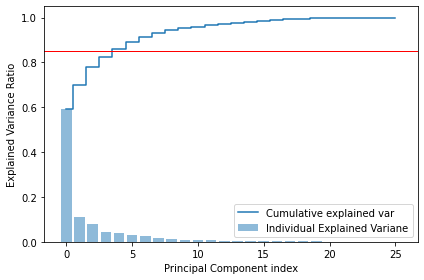

In [77]:
# 주성분 분석의 component수를 알기 위해 cumulative Explained Variance
# 그래프 확인

# 공분산 행렬
cov_matrix = numpy.cov(x, rowvar=False)
#print(cov_matrix)

# 고유벡터, 고유값 계산
egnvalues, egnvectores = eigh(cov_matrix)
#print(egnvalues, egnvectores)

# 설명가능 분산량 계산
total_egnvalues = sum(egnvalues)

var_exp = [(i/total_egnvalues) for i in sorted(egnvalues, reverse=True)]

# 시각화

cum_sum_exp = numpy.cumsum(var_exp)
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label = 'Individual Explained Variane')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where ='mid', label='Cumulative explained var')
plt.ylabel('Explained Variance Ratio')
plt.xlabel("Principal Component index")
plt.legend(loc='best')
plt.tight_layout()
plt.axhline(y=0.85, color='r',linewidth=1)
plt.show()

# 5개의 component가 전체 분산의 85%이상을 설명하고 있습니다.
# PCA의 component는 5개가적당하는 것을 알 수 있습니다.

In [80]:
# PCA(Principal Component Analysis)

pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)
principal_df = pandas.DataFrame(data = principalComponents, columns = ['pcaComp1', 'pcaComp2', 'pcaComp3', 'pcaComp4', 'pcaComp5'])
print(principal_df.head())

# n_components로 선언되어 생성된 주성분의 개수만큼 전체 데이터의 분산을 얼마나 설명 가능한지
# explained_variance_ration_를 통해 확인할 수 있습니다. 

print(pca.explained_variance_ratio_)
print("원본 데이터 설명률 : {}%".format(round(sum(pca.explained_variance_ratio_),5)*100))

   pcaComp1  pcaComp2  pcaComp3  pcaComp4  pcaComp5
0  2.984104 -0.816480 -1.753301 -0.201373 -1.136043
1 -3.794804 -0.620447  1.251830 -1.037681  0.010536
2  3.281121 -2.173977 -1.945966 -0.130778  1.109666
3  3.509760  4.156012 -0.358541  1.079678  1.904928
4 -4.505569 -1.130444 -0.059982 -0.126100  0.073076
[0.59187523 0.10849578 0.07850286 0.04393941 0.03710323]
원본 데이터 설명률 : 85.992%


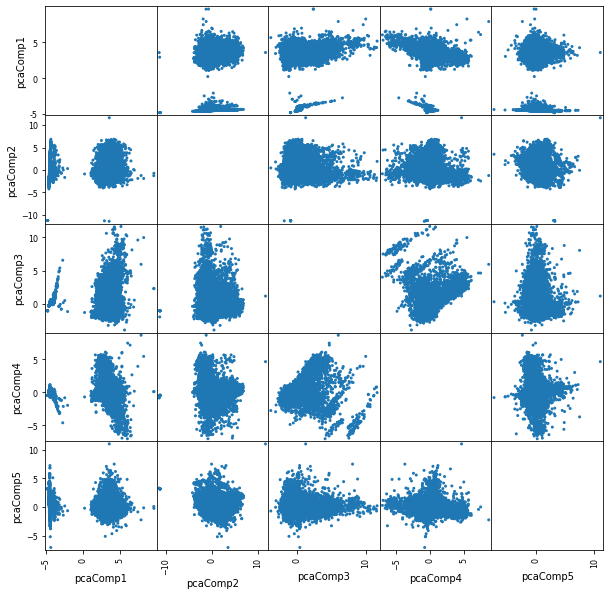

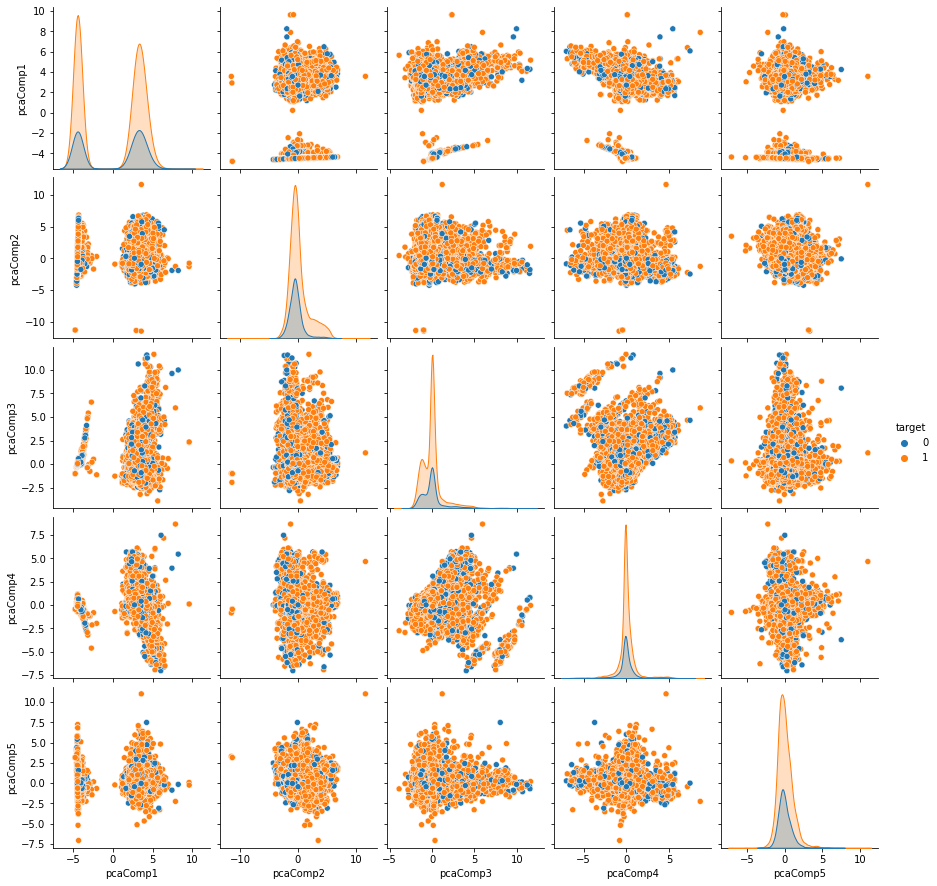

In [98]:
# 5개의 주성분으로 차원 축소된 데이터셋을 이용한 타겟 분할 시각화 결과

final_df = pandas.concat([principal_df, target_df], axis=1)

# 변수간 산점도 
from pandas.plotting import scatter_matrix
scatter_matrix(principal_df, alpha = 1, figsize=(10, 10), diagonal="None")

# 다차원의 결과 산점도이므로 시각적으로 확인하기 어렵습니다.
seaborn.pairplot(data=final_df, hue='target')
plt.show()